### Team Members:</b>

Niveditha Kumarasamy sb3893

Shruti Joshi         jd4923

Suchitra Venkatesan  qw9684

Vani Joshi           eu2388</br>

### INTRODUCTION</b></br>

The goal of this assignment is to predict the number of wine cases that are sold based on some chemical properties of the wine. This is done by exploring the various features in the dataset, cleaning the data and employing some analytical tools and techniques to develop models. The model that will best predict the wine sales is chosen.

### The work is carried out in different stages.<br>
1) <b>Data Exploration</b> - Data is cleaned, scaled and analyzed<br>
2) <b>Data Preparation</b> - Analyzing correlation between wine properties & deciding the ones that contribute the most towards sales<br>
3) <b>Building Models</b>  - Developing different models to best predict the wine sales based on properties<br>
4) <b>Model Selection</b>  - Selecting the model with least error and low implementation cost

### Initial observations:<br>

- The categorical features, <b>STARS and LabelAppeal</b> seem to vary proportionally with TARGET over the entire range<br>
- STARS : seems to be logically the most valuable variable for indicating desire for purchase.
          4 Stars = Excellent, 1 Star = Poor
          A high number of STARS suggests high sales (TARGET).
- LabelAppeal : Marketing Score indicating the appeal of label design for consumers
          High numbers suggest customers like the label design
          Higher numbers suggest better sales

In [56]:
# Import the required functionality
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline  

from sklearn.impute import KNNImputer 
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from adjustText import adjust_text  #pip install adjustText
from sklearn.model_selection import cross_val_predict

from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPClassifier

from sklearn import neighbors
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression,Lasso, Ridge,RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree
import pydotplus
from sklearn import tree
import pydot
import graphviz
import math
import itertools

import warnings
warnings.filterwarnings('ignore')

<font size = "4"><font color='blue'><br><b>1. DATA EXPLORATION</b></br>

In [57]:
df = pd.read_csv('WINE_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

A priliminary scan of the data indicates a lot of <b>missing values</b> for the features. 

The STARS feature in particular has 26.25% of data missing

In [4]:
for x in ['TARGET','LabelAppeal','STARS']:
    print(df[x].value_counts().shape)

(9,)
(5,)
(4,)


5 different types of Label Appeal values and 4 types of STAR ratings for the data

Lower STAR rating results in lesser number of wine TARGETS being sampled. Hence, the <b>missing values can be imputed as 0 for STAR</b>

In [5]:
# Mean, SD and Min-MAx of all the features

df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


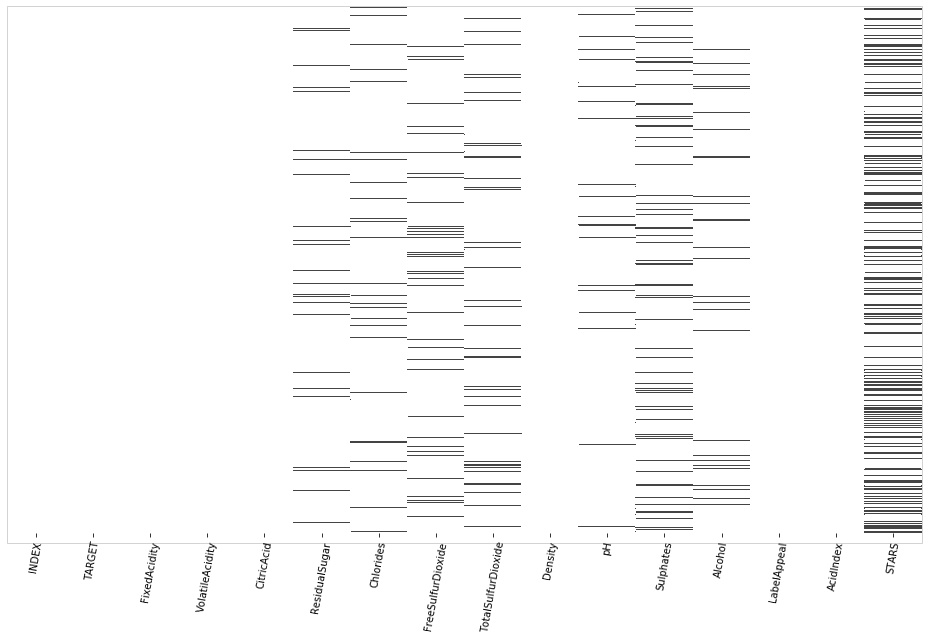

In [6]:
# Exploring data for missing values using HeatMap

naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

The above heatmap indicates missing values in every column/feature with a '_______'

In [7]:
# Counting the missing values in the data

print(df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


In [8]:
# Imputing missing values in STAR column with 0s

df['STARS'] = df['STARS'].fillna(0)

In [88]:
# Scaling the data using MinMax scaler

scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
scaled_data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.333333
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.666667
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.666667
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.000000
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.333333


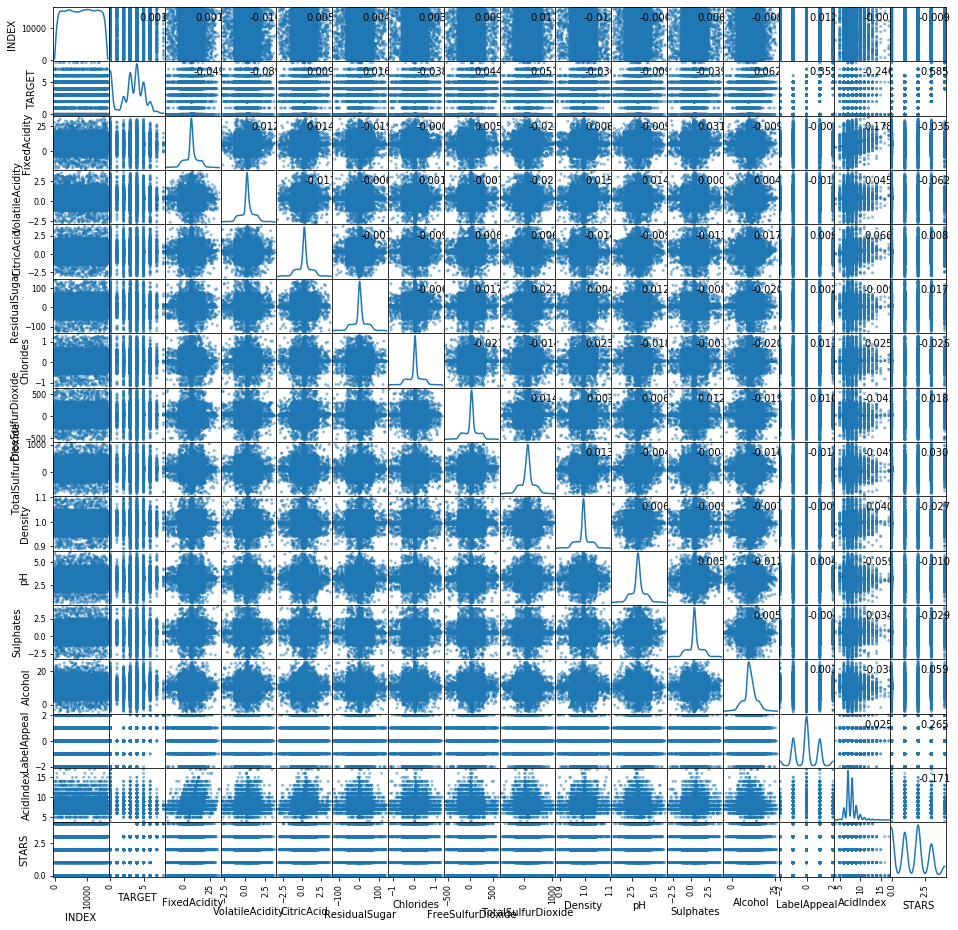

In [10]:
# Scatter Plot

axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(16, 16))
corr = scaled_data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

The Scatter plots indicate that lower Label Appeal implies lesser number of TARGET samples.


The plot of TARGEt vs STARS show greater the STAR rating, higher the number of TARGET samples sold

The scatter plots also indicate that there is no correlation between features like Ciric Acid, Acid content, Fixed Acidity etc.

The plots do not show any outlier for the features

In [11]:
scaled_data.corr()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
INDEX,1.000000,0.001256,0.001133,-0.010224,0.004922,0.003846,0.002966,0.009257,0.010756,-0.010779,-0.005853,0.006413,-0.007677,0.011553,-0.007097,-0.008883
TARGET,0.001256,1.000000,-0.049011,-0.088793,0.008685,0.016491,-0.038263,0.043824,0.051478,-0.035518,-0.009445,-0.038850,0.062062,0.356500,-0.246049,0.685381
FixedAcidity,0.001133,-0.049011,1.000000,0.012375,0.014240,-0.018855,-0.000457,0.004972,-0.022498,0.006477,-0.008983,0.030783,-0.009371,-0.003366,0.178437,-0.035416
VolatileAcidity,-0.010224,-0.088793,0.012375,1.000000,-0.016953,-0.006483,0.000987,-0.007077,-0.021080,0.014735,0.013592,0.000129,0.004073,-0.016987,0.044642,-0.062276
CitricAcid,0.004922,0.008685,0.014240,-0.016953,1.000000,-0.006940,-0.008567,0.006428,0.006320,-0.013952,-0.008709,-0.012989,0.017046,0.008650,0.065697,0.008485
ResidualSugar,0.003846,0.016491,-0.018855,-0.006483,-0.006940,1.000000,-0.005594,0.017493,0.022479,0.004101,0.012118,-0.007723,-0.019998,0.002320,-0.009414,0.017203
Chlorides,0.002966,-0.038263,-0.000457,0.000987,-0.008567,-0.005594,1.000000,-0.020661,-0.013994,0.022657,-0.017605,-0.003290,-0.019695,0.010509,0.025238,-0.024547
FreeSulfurDioxide,0.009257,0.043824,0.004972,-0.007077,0.006428,0.017493,-0.020661,1.000000,0.013720,0.003176,0.006049,0.011593,-0.018588,0.010294,-0.041717,0.018171
TotalSulfurDioxide,0.010756,0.051478,-0.022498,-0.021080,0.006320,0.022479,-0.013994,0.013720,1.000000,0.012816,-0.004343,-0.007133,-0.015957,-0.009747,-0.049311,0.029688
Density,-0.010779,-0.035518,0.006477,0.014735,-0.013952,0.004101,0.022657,0.003176,0.012816,1.000000,0.005768,-0.009059,-0.007215,-0.009370,0.040413,-0.026567


Strong positive correlation between TARGET and (LabelAppeal & STARS)

Strong negative correlation between TARGET and AcidIndex

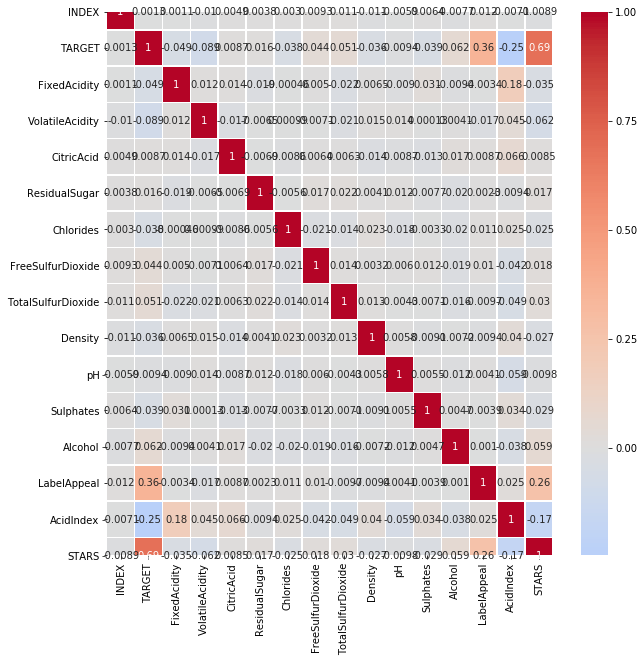

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(scaled_data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

<font size = "4"><font color='blue'><br><b>2. DATA PREPARATION</b></br>

In [86]:
scaled_data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,0.353990,0.580319,0.495903,0.504425,...,0.554700,0.333333,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.480384,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.554700,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.392232,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.500,0.497143,0.482226,0.278873,0.510132,0.475020,0.329372,0.495213,0.504286,0.467257,...,0.620174,0.333333,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [89]:
scaled_data = scaled_data.drop("INDEX", axis = 1)

In [18]:
scaled_data.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50
5,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,0.481416,0.599729,0.644231,0.50,0.538462,0.00
6,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,0.532743,0.588874,0.480769,0.50,0.307692,0.00
7,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,0.481416,NaN,0.522436,0.75,0.230769,0.75
8,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,0.787611,0.459973,0.631410,0.50,0.153846,0.00
9,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,0.461947,0.526459,0.554487,0.50,0.307692,1.00


In [61]:
#Create flags to suggest if a variable was missing

missing_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']
for col in missing_cols:
    scaled_data[col+"_missing"] = np.where(scaled_data[col].isnull(), 0, 1)
    
scaled_data.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,...,0.307692,0.333333,1,1,0,1,1,1,1,1
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.230769,0.666667,1,1,1,1,1,1,0,1
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.307692,0.666667,1,1,1,1,1,1,1,1
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.153846,0.000000,1,1,1,1,1,1,1,1
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,...,0.384615,0.333333,1,0,1,1,1,1,1,1
5,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,0.481416,...,0.538462,NaN,1,1,1,1,1,1,1,0
6,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,0.532743,...,0.307692,NaN,1,1,1,1,1,1,1,0
7,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,0.481416,...,0.230769,0.666667,1,1,1,1,1,0,1,1
8,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,0.787611,...,0.153846,NaN,1,1,1,0,1,1,1,0
9,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,0.461947,...,0.307692,1.000000,1,1,1,1,1,1,1,1


In [62]:
# Add median values (IMPUTE) to the missing values in the columns

imputer = KNNImputer(n_neighbors=2)  #impute missing values
scaled_data.iloc[:,1:]=imputer.fit_transform(scaled_data.iloc[:,1:]) #replace df with imputed missing values
scaled_data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,0.353990,0.580319,0.495903,0.504425,...,0.307692,0.333333,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.230769,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.307692,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.153846,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.500,0.497143,0.482226,0.278873,0.510132,0.475020,0.329372,0.495213,0.504286,0.467257,...,0.384615,0.333333,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Transform data by putting it into buckets(discretization):

3 important wine features that customers often look for are chosen and discretized/bucketed into different bins.

- Label Appeal    : "Low_Appeal","Moderately_Low_Appeal", "Moderately_High_Appeal", "High_Appeal"
- Alcohol content : "V_Low_Alcohol", "Low_Alcohol", "High_Alcohol", "V_High_Alcohol"
- STARS           :  "Low_Rating", "Moderate_Rating", "High_Rating"


In [63]:
scaled_data.groupby(['LabelAppeal']).size()

LabelAppeal
0.00     504
0.25    3136
0.50    5617
0.75    3048
1.00     490
dtype: int64

In [22]:
scaled_data['LabelAppeal_bin']=pd.cut(x=scaled_data['LabelAppeal'], bins=[0,0.25,.50,0.75,1], labels=["Low_Appeal","Moderately_Low_Appeal", "Moderately_High_Appeal", "High_Appeal"])
scaled_data['LabelAppeal_bin'].value_counts()

Moderately_Low_Appeal     5617
Low_Appeal                3136
Moderately_High_Appeal    3048
High_Appeal                490
Name: LabelAppeal_bin, dtype: int64

The average glass of wine contains around 11% to 13% alcohol, but bottles range from as little as 5.5% alcohol by volume to as much as around 20% ABV. 

- Very Low (Below 12.5 Percent)
- Low (12.5 to 13.5 Percent)
- High (13.5 to 14.5 Percent)
- Very High (More Than 14.5 Percent)

In [25]:
scaled_data['Alcohol'].describe()

count    12795.000000
mean         0.486883
std          0.117976
min          0.000000
25%          0.439103
50%          0.483974
75%          0.546474
max          1.000000
Name: Alcohol, dtype: float64

In [26]:
scaled_data['Alcohol_bin']=pd.cut(x=scaled_data['Alcohol'], bins=4, labels=["V_Low_Alcohol","Low_Alcohol","High_Alcohol", "V_High_Alcohol"])
scaled_data['Alcohol_bin'].value_counts()

Low_Alcohol       7171
High_Alcohol      5058
V_Low_Alcohol      328
V_High_Alcohol     238
Name: Alcohol_bin, dtype: int64

In [27]:
scaled_data.groupby(['STARS']).size()

STARS
0.00    3359
0.25    3042
0.50    3570
0.75    2212
1.00     612
dtype: int64

In [28]:
scaled_data['STARS_bin']=pd.cut(x=scaled_data['STARS'], bins=3, labels=["Low_Rating","Moderate_Rating","High_Rating"])
scaled_data['STARS_bin'].value_counts()

Low_Rating         6401
Moderate_Rating    3570
High_Rating        2824
Name: STARS_bin, dtype: int64

In [29]:
# Mathematical Transformation

# Checking the Skewness of the data

scaled_data.skew(axis = 0, skipna = True)

TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.051587
Chlorides                     0.030444
FreeSulfurDioxide             0.002126
TotalSulfurDioxide           -0.007851
Density                      -0.018698
pH                            0.045805
Sulphates                     0.005650
Alcohol                      -0.027085
LabelAppeal                   0.008431
AcidIndex                     1.648883
STARS                         0.254900
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
pH_missing                   -5.425049
Sulphates_missing            -2.771394
Alcohol_missing              -4.080670
STARS_missing                 0.000000
dtype: float64

- If skewness value lies above +1 or below -1, data is highly skewed. 
- If it lies between +0.5 to -0.5, it is moderately skewed. 
- If the value is 0, then the data is symmetric

The AcidIndex feature is highly positively skewed with a value of 1.648883 (> 1). Hence Square Root transformation can be applied to this feature

The missing value columns are not transformed since they are added only to indicate any missing values and hence do not posses any mathematical importance as such

In [64]:
#Square root transformation, Applied to positive values only

scaled_data["AcidIndex"] = scaled_data["AcidIndex"]**(1/2)
scaled_data.skew(axis = 0, skipna = True)

TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.052327
Chlorides                     0.029051
FreeSulfurDioxide             0.002722
TotalSulfurDioxide           -0.009536
Density                      -0.018698
pH                            0.045523
Sulphates                     0.005637
Alcohol                      -0.027994
LabelAppeal                   0.008431
AcidIndex                     0.767241
STARS                         0.481848
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
pH_missing                   -5.425049
Sulphates_missing            -2.771394
Alcohol_missing              -4.080670
STARS_missing                -1.079546
dtype: float64

In [31]:
# Combine variable

From the correlation table, every feature is poorly correlated with every other feature. Hence no two variables/features are similar and therefore cannot be combined to create any new meaningful variable

In [65]:
# PCA

scaler_pca = preprocessing.MinMaxScaler()
pcs = PCA(whiten=True) #all features
scores = pd.DataFrame(pcs.fit_transform(scaler_pca.fit_transform(scaled_data.iloc[:,0:15])),
                      columns=['PC{}'.format(i) for i in range(0, 15)]) #Creating 15 PCA components
scores.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.018718,-0.004189,-0.047080,0.865440,-0.762556,2.210962,1.854644,0.625235,-0.626340,0.429344,-1.304140,-0.596584,-0.389419,0.005775,-0.647603
1,0.398355,1.513903,-1.269654,0.314121,-0.574082,-0.073547,1.670788,1.372680,-0.018630,0.910438,1.365043,-1.564914,-0.179054,-0.383472,0.199511
2,0.787925,0.773508,-1.961440,0.081256,-0.156031,-0.602015,1.203519,1.711803,1.273973,1.311882,-0.977383,1.468654,-2.253964,2.319961,-1.089686
3,-1.073233,-0.715158,-1.003532,1.040848,0.265641,-0.406257,0.459974,0.602953,-1.113344,-0.359507,-0.233986,-0.748689,-1.071487,-1.707191,1.653986
4,0.162788,-0.323682,-0.252461,-0.662229,0.398073,-0.084398,0.447525,1.860665,-1.596815,-0.287843,-0.147443,-0.517549,-0.423088,0.757142,-1.286271


Considering all the features in the dataset for PCA except for the missing_variable columns added to indicate missing variables since they don't add any valuable analytical information for PCA

In [66]:
# Explained variance by component

pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance ratio
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Explained Variance,0.110863,0.042521,0.034940,0.016184,0.016122,0.015670,0.015300,0.015149,0.014948,0.014789,0.014331,0.014236,0.014086,0.013362,0.006718
Explained Variance Ratio,0.308623,0.118371,0.097266,0.045053,0.044882,0.043622,0.042592,0.042172,0.041613,0.041171,0.039894,0.039631,0.039212,0.037198,0.018700
Cumulative Proportion,0.308623,0.426994,0.524260,0.569313,0.614194,0.657817,0.700408,0.742580,0.784193,0.825364,0.865258,0.904889,0.944101,0.981300,1.000000


From the Explained Variance for each component, it is seen that PC0 component explains 13.27% variance within the data, PC1 explains 4.3% and so on

Text(0.5, 1.0, 'Explained Variance by Component')

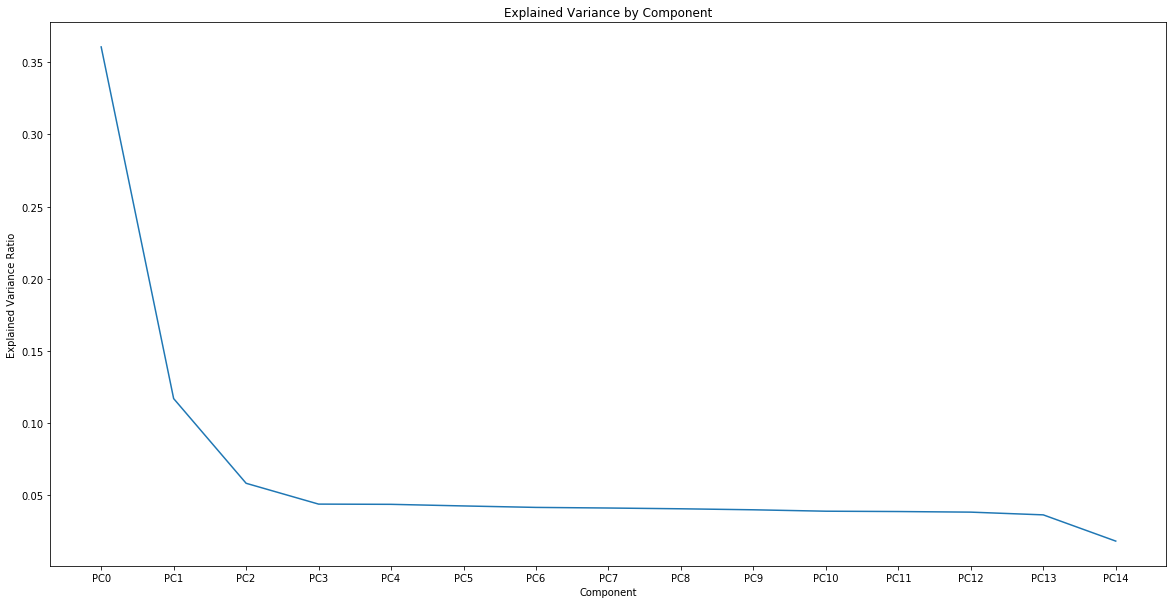

In [34]:
#scree plot

plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

The elbow rule for the scree plot using MinMax scaler indicates that 4 PCA components (PC0 - PC3) could be used for analysis.

In [67]:
#PCA- component analysis for each feature in the dataset

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=scaled_data.iloc[:,0:15].columns)
pcsComponents_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
TARGET,0.521507,-0.644536,-0.528205,-0.079886,0.006367,-0.061877,0.011546,0.035888,-0.030846,0.073692,-0.040813,0.020079,0.023511,-0.046659,-0.103685
FixedAcidity,-0.011848,0.029097,0.049139,-0.061610,0.186893,-0.499347,0.027910,-0.162566,-0.210375,0.357784,-0.459741,-0.217882,0.336500,0.306941,0.206816
VolatileAcidity,-0.025898,0.037666,0.059201,-0.081888,-0.024304,-0.009718,0.310969,0.284351,0.202078,0.348764,-0.459365,0.573227,-0.286522,-0.157744,0.020061
CitricAcid,0.001337,-0.011237,0.005839,0.031942,0.200561,-0.105745,-0.034257,-0.725123,-0.055551,0.183504,0.292652,0.483017,0.038061,-0.237269,0.083538
ResidualSugar,0.006327,-0.001650,-0.015683,0.422937,-0.409218,0.297626,-0.214983,0.020615,-0.442421,0.546250,0.048739,-0.010879,-0.111834,0.094743,0.007135
Chlorides,-0.005448,0.020568,0.048660,-0.542794,-0.233045,-0.082792,-0.726983,0.103283,0.080840,0.056476,0.015520,0.261785,0.049904,0.145248,0.011585
FreeSulfurDioxide,0.007035,-0.042031,-0.025486,0.561091,-0.185932,-0.447232,-0.241250,-0.027248,0.603597,0.021500,0.033610,-0.015238,-0.115410,0.092197,-0.034744
TotalSulfurDioxide,0.009899,-0.026998,-0.057466,0.211405,-0.244834,0.073655,-0.051777,-0.270795,-0.243061,-0.594589,-0.481307,0.315090,-0.018998,0.254941,-0.029840
Density,-0.011561,0.017155,0.025370,-0.271104,-0.715261,-0.393491,0.420354,-0.098726,-0.101877,-0.042643,0.224339,-0.055442,-0.038774,-0.062800,0.038813
pH,-0.000838,0.002353,0.007474,0.148604,-0.093272,0.119454,0.184790,0.241035,0.117437,0.024085,0.208134,0.363692,0.788346,0.208157,-0.088653


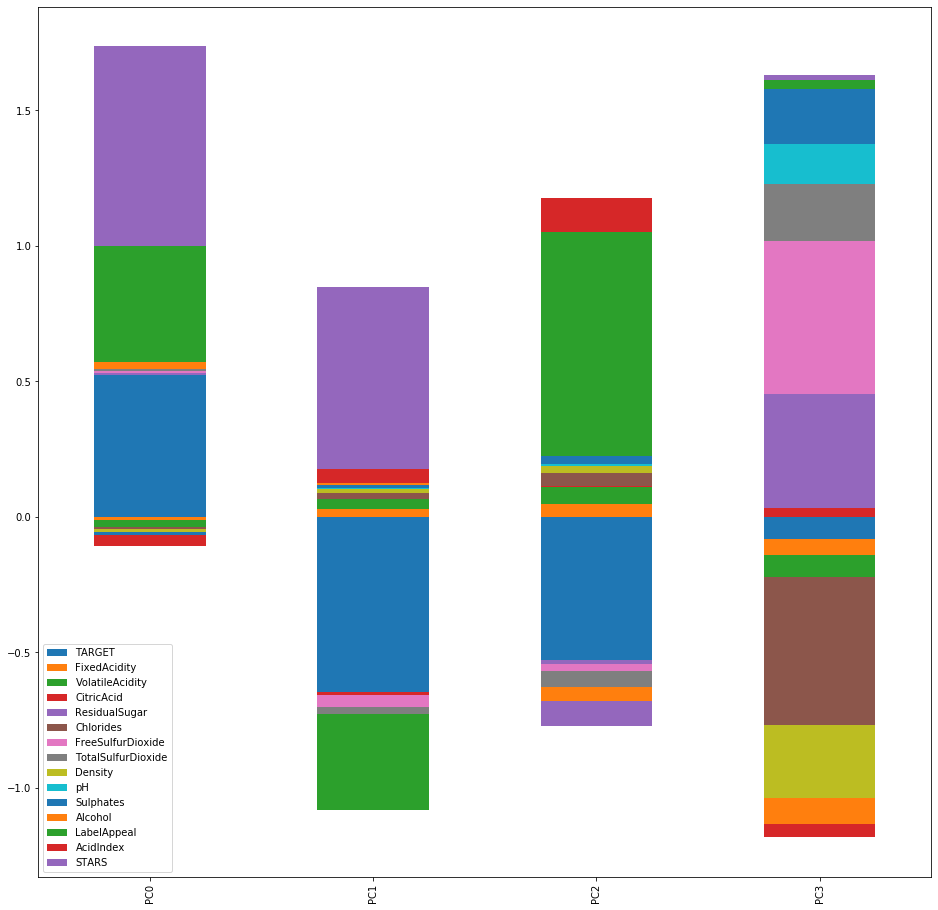

In [68]:
#Analysis of the first 4 components using stacked bar plot

pcsComponents_df[['PC0','PC1','PC2', 'PC3']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

### Analysis of PC0 - PC3 components

- PC0 : largely contains useful information on STARS, LabelAppeal & TARGET features
- PC1 : largely contains useful information on STARS, LabelAppeal & AcidIndex features
- PC2 : largely contains useful information on STARS, LabelAppeal, TARGET & AcidIndex features
- PC3 : largely contains useful information on Density, Chlorides and Sulphates features

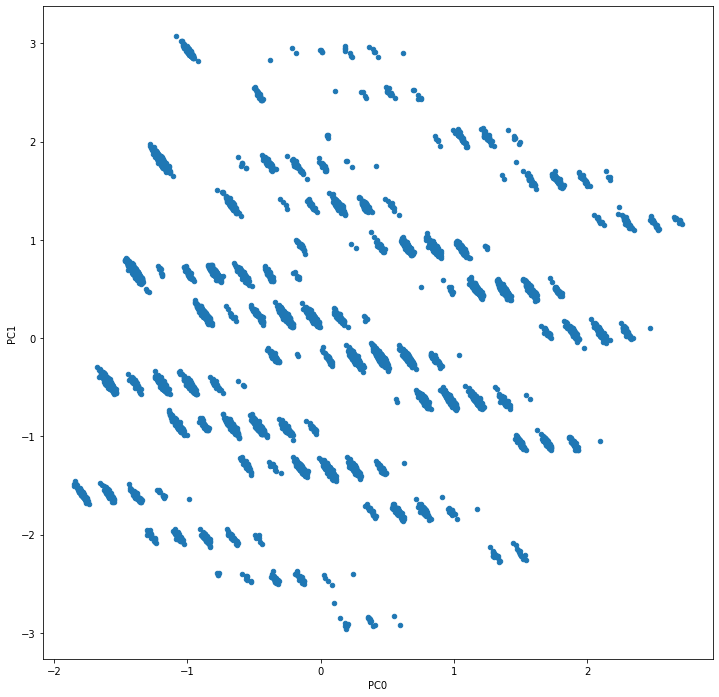

In [37]:
#Scatter plot of PC0 vs PC1

scores.plot.scatter(x='PC0', y='PC1',figsize=(12, 12)) # plot first 2 components

Scatter plot of PC0 vs PC1 shows the plot of the first two components of the PCA Analysis. It shows the how wine samples with similar chemical properties are grouped together, thereby forming different clusters

In [38]:
#Determining the Silhouette score and inertia of the cluster by using 4 Principal Components

col_used=['PC0', 'PC1', 'PC2', 'PC3'] #number of components used

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,25):  #Iterating until 30 where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[col_used])
    silhouette.append(silhouette_score(scores[col_used],kmeans.labels_)) #creating a list of silhouette scores
    inertia.append(kmeans.inertia_) #creating the list of inertia
    clusters.append(i)
    
print('The max silhouette value is: ',max(silhouette))

The max silhouette value is:  0.24214354066802526


In [39]:
#Evaluating KMeans Clustering for the dataset

kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters) #put silhouette and inertia in df
kmeans_eval.head(8)

,silhouette_score,inertia
2,0.242144,41339.738732
3,0.233252,33551.737085
4,0.240989,28365.859952
5,0.234598,25013.768859
6,0.230951,22921.680077
7,0.232437,21089.350881
8,0.215680,19835.755857
9,0.212783,18748.378666


The maximum Silhouette score is for a k value of 4

Text(0.5, 1.0, 'Scree Plot Inertia')

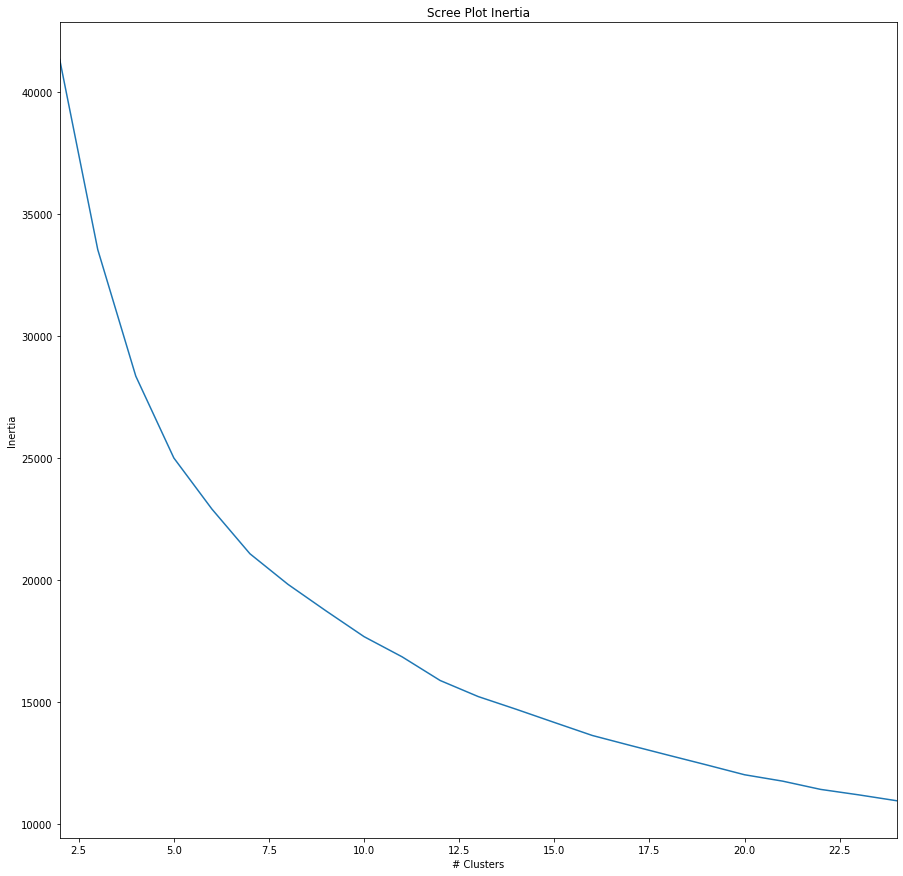

In [40]:
#Plotting the Scree Plot Inertia to identify the likely number of clusters

kmeans_eval['inertia'].plot(figsize=(15, 15))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

Based on the elbow rule, the scree plot indicates that around 8 clusters can be used for KMeans clustering

Text(0.5, 1.0, 'Silhouette score by # of clusters')

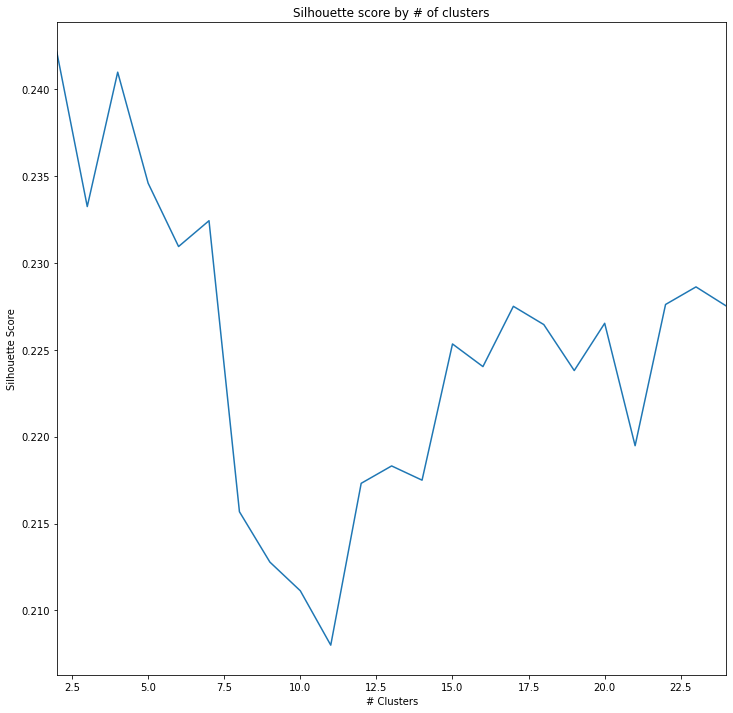

In [41]:
#Silhouette score plot further gives an idea on the number of clusters

kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score to visually look for highest value & corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')

The plot peaks at a value of 4. Hence choosing to divide the data into 4 clusters

In [42]:
print(kmeans_eval['silhouette_score'])

2     0.242144
3     0.233252
4     0.240989
5     0.234598
6     0.230951
7     0.232437
8     0.215680
9     0.212783
10    0.211130
11    0.207999
12    0.217317
13    0.218318
14    0.217499
15    0.225341
16    0.224038
17    0.227509
18    0.226457
19    0.223810
20    0.226531
21    0.219483
22    0.227614
23    0.228626
24    0.227521
Name: silhouette_score, dtype: float64


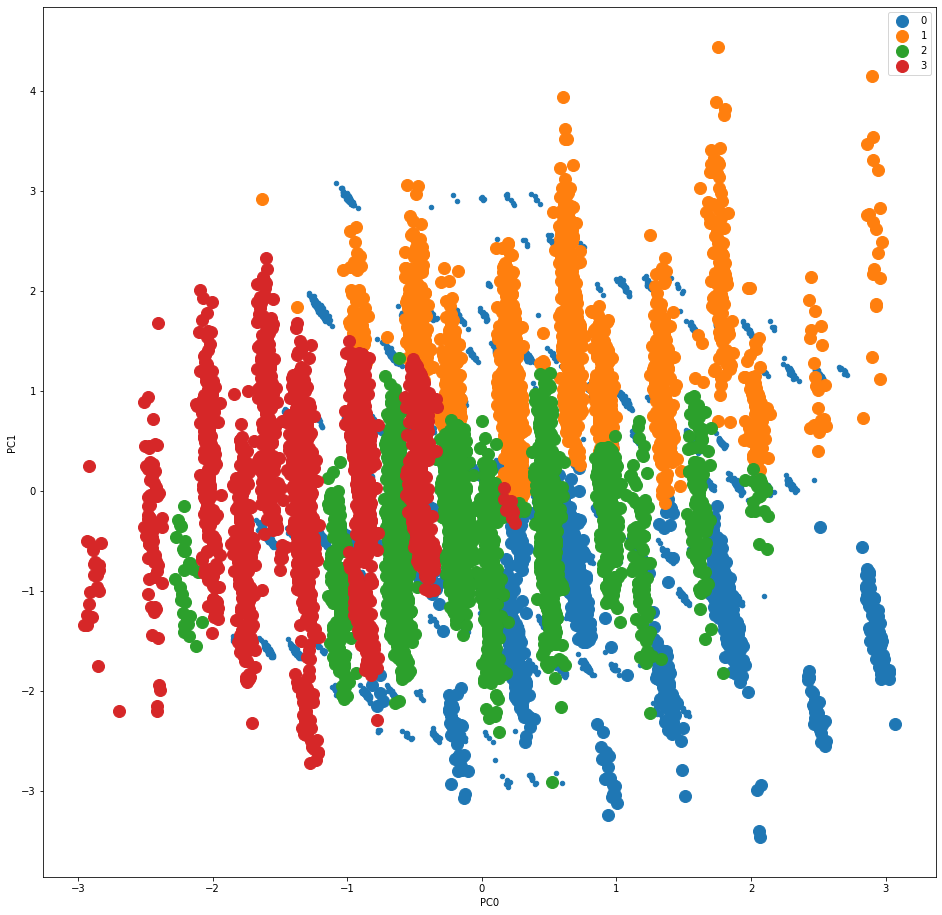

In [43]:
#Taking clusters 4 provides a well define plot

cols=['PC0','PC1', 'PC2', 'PC3'] # PCA Components used for clustering

kmeans= KMeans(n_clusters=4).fit(scores[cols]) 
scores['cluster']=kmeans.labels_

groups = scores.groupby('cluster')

scaled_data['cluster']=scores['cluster']
ax = scores.plot.scatter(x='PC0', y='PC1', figsize=(16, 16))
points = scores[['PC0','PC1']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() 

The dataset is divided into 4 different clusters<br><br>
<font color = 'blue'>Cluster 0 : Cluster having high STARS, LabelAppeal & TARGET features<br>
    <font color = 'orange'>Cluster 1 : Cluster having medium STARS, LabelAppeal & TARGET features<br>
        <font color = 'green'>Cluster 2 : Cluster having very low STARS, LabelAppeal & TARGET features<br>
            <font color = 'red'>Cluster 3 : Cluster having low STARS, LabelAppeal & TARGET features

<font size = "4"><font color='blue'><br><b>3. BUILD MODELS</b></br>

In [69]:
scaled_data.columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS', 'ResidualSugar_missing', 'Chlorides_missing',
       'FreeSulfurDioxide_missing', 'TotalSulfurDioxide_missing', 'pH_missing',
       'Sulphates_missing', 'Alcohol_missing', 'STARS_missing'],
      dtype='object')

In [70]:
# Data Partitioning

predictors = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS']

outcome = 'TARGET'

X = pd.get_dummies(scaled_data[predictors], drop_first=True)
y = df[outcome]
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.3, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

#train model using training data
train_X

Training :  (6397, 14)
Validation :  (4478, 14)
Test :  (1920, 14)


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
7763,0.485714,0.344668,0.914085,0.249117,0.339810,0.478778,0.499734,0.582619,0.509735,0.540027,0.842949,0.75,0.554700,0.333333
422,0.045714,0.415765,0.464789,0.285927,0.729183,0.491511,0.770213,0.506323,0.495575,0.617368,0.371795,0.75,0.620174,0.000000
9428,0.607619,0.533230,0.254930,0.481874,0.732355,0.943124,0.680319,0.519583,0.536283,0.500678,0.467949,0.75,0.554700,0.333333
1095,0.405714,0.521638,0.267606,0.496747,0.482554,0.738540,0.542553,0.125030,0.591150,0.521031,0.198718,0.50,0.392232,0.000000
2309,0.476190,0.435858,0.674648,0.686373,0.478588,0.298812,0.671809,0.498745,0.389381,0.411126,0.455128,1.00,0.480384,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.626667,0.471406,0.488732,0.514594,0.477795,0.339559,0.551064,0.348425,0.527434,0.795115,0.637821,0.50,0.277350,0.000000
905,0.413333,0.523957,0.504225,0.661089,0.291039,0.466893,0.503723,0.515794,0.231858,0.290366,0.500000,0.25,0.554700,0.666667
5192,0.447619,0.267388,0.566197,0.699015,0.622522,0.448217,0.210638,0.522377,0.745133,0.332429,0.467949,0.75,0.554700,1.000000
12172,0.653333,0.443586,0.516901,0.523517,0.417129,0.731749,0.528723,0.274118,0.460177,0.439620,0.358974,0.75,0.480384,0.333333


<font color = red> Regression Model

In [71]:
def findsubsets(s, n): 
    return list(map(set, itertools.combinations(s, n)))

In [72]:
def exhaustive(model,train_X,train_y,valid_X,valid_y):
    low_err=600000**2

    for x in range(len(train_X.columns),0,-1):
        n=x
        ss=findsubsets(train_X.columns,n)
        print("_"*50)
        print(str(len(ss))+" model(s) using "+ str(n)+ " features")
        for z in range(0,len(ss)):
        
            model = model
            reg  = model.fit(train_X[ss[z]], train_y)
            
            pred_train = reg.predict(train_X[ss[z]])
            mse_train= mean_squared_error(train_y, pred_train)
            rmse_train=mse_train**.5
            mad_train=mean_absolute_error(train_y,pred_train)
                        
            pred_valid = reg.predict(valid_X[ss[z]])
            mse_valid= mean_squared_error(valid_y, pred_valid)
            rmse_valid=mse_valid**.5
            mad_valid=mean_absolute_error(valid_y,pred_valid)
        
            if rmse_valid < low_err:
                low_err=rmse_valid
                low_err_features=list(ss[z])
                print("_"*100)
                print(low_err_features)
                print("_"*50)
                print("train mse: "+str(mse_train))
                print("train rmse: "+str(rmse_train))
                print("train mad: "+str(mad_train))
                print("valid mse: "+str(mse_valid))
                print("valid rmse: "+str(rmse_valid))
                print("valid mad: "+str(mad_valid))
                abs(valid_y-pred_valid).hist()
                plt.show()                      

__________________________________________________
1 model(s) using 14 features
____________________________________________________________________________________________________
['FreeSulfurDioxide', 'LabelAppeal', 'FixedAcidity', 'ResidualSugar', 'Density', 'VolatileAcidity', 'CitricAcid', 'AcidIndex', 'pH', 'Chlorides', 'Alcohol', 'TotalSulfurDioxide', 'STARS', 'Sulphates']
__________________________________________________
train mse: 2.790001493519296
train rmse: 1.6703297559222539
train mad: 1.3133503316562167
valid mse: 2.716628491184453
valid rmse: 1.6482197945615302
valid mad: 1.2971813722209837


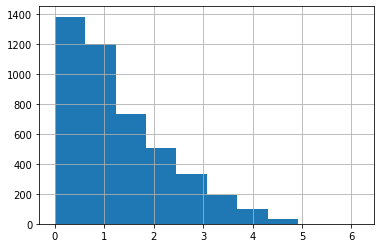

__________________________________________________
14 model(s) using 13 features
____________________________________________________________________________________________________
['FreeSulfurDioxide', 'LabelAppeal', 'FixedAcidity', 'ResidualSugar', 'Density', 'VolatileAcidity', 'CitricAcid', 'AcidIndex', 'Chlorides', 'Alcohol', 'TotalSulfurDioxide', 'STARS', 'Sulphates']
__________________________________________________
train mse: 2.794249556436931
train rmse: 1.671600896277856
train mad: 1.3145415387682173
valid mse: 2.7152970771883393
valid rmse: 1.647815850508891
valid mad: 1.2970602072911015


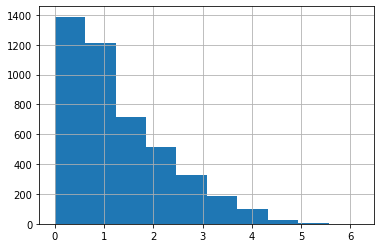

____________________________________________________________________________________________________
['FreeSulfurDioxide', 'LabelAppeal', 'FixedAcidity', 'Density', 'VolatileAcidity', 'CitricAcid', 'AcidIndex', 'pH', 'Chlorides', 'Alcohol', 'TotalSulfurDioxide', 'STARS', 'Sulphates']
__________________________________________________
train mse: 2.790847318073315
train rmse: 1.670582927625359
train mad: 1.3136779354331738
valid mse: 2.7140244514030605
valid rmse: 1.6474296499101442
valid mad: 1.2957674331408267


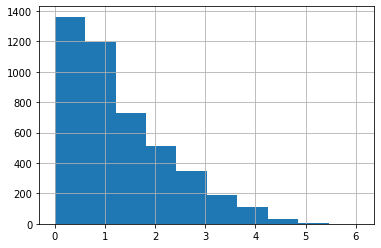

__________________________________________________
91 model(s) using 12 features
____________________________________________________________________________________________________
['FreeSulfurDioxide', 'LabelAppeal', 'FixedAcidity', 'Density', 'VolatileAcidity', 'CitricAcid', 'AcidIndex', 'Chlorides', 'Alcohol', 'TotalSulfurDioxide', 'STARS', 'Sulphates']
__________________________________________________
train mse: 2.7950385435514726
train rmse: 1.6718368770760719
train mad: 1.3147459896942166
valid mse: 2.712801631012163
valid rmse: 1.6470584783219335
valid mad: 1.295888954355542


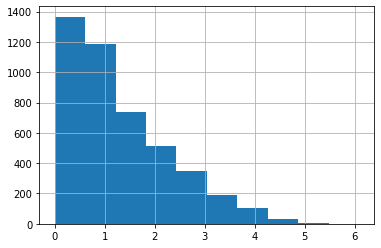

__________________________________________________
364 model(s) using 11 features
____________________________________________________________________________________________________
['FreeSulfurDioxide', 'LabelAppeal', 'Density', 'VolatileAcidity', 'CitricAcid', 'AcidIndex', 'Chlorides', 'Alcohol', 'TotalSulfurDioxide', 'STARS', 'Sulphates']
__________________________________________________
train mse: 2.795764392186343
train rmse: 1.672053944161594
train mad: 1.314887190864838
valid mse: 2.7118929590193472
valid rmse: 1.6467826083060713
valid mad: 1.2955668232447082


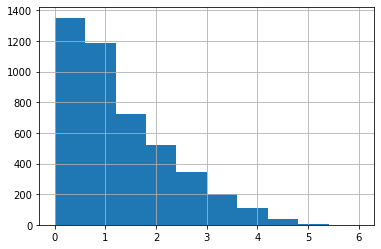

__________________________________________________
1001 model(s) using 10 features
__________________________________________________
2002 model(s) using 9 features
__________________________________________________
3003 model(s) using 8 features
__________________________________________________
3432 model(s) using 7 features
__________________________________________________
3003 model(s) using 6 features
__________________________________________________
2002 model(s) using 5 features
__________________________________________________
1001 model(s) using 4 features
__________________________________________________
364 model(s) using 3 features
__________________________________________________
91 model(s) using 2 features
__________________________________________________
14 model(s) using 1 features


In [73]:
exhaustive(model=LinearRegression(normalize=False,n_jobs=-1),
           train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

### Observations :
#### 364 model(s) using the below 11 features is the MULTIPLE LINEAR REGRESSION model with the least RMSE error for the Validation dataset :
['Density', 'Chlorides', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'TotalSulfurDioxide', 
 'FreeSulfurDioxide', 'VolatileAcidity', 'CitricAcid', 'Sulphates', 'STARS']

- valid mse: 2.7118929590193472
- valid rmse: 1.6467826083060713
- valid mad: 1.2955668232447082

### Regularization / Shrinkage:
- Regularization/Shrinkage -> “shrinks” the coefficients towards zero.

In [74]:
def reg_shrink(model,train_X,train_y,valid_X,valid_y):
        model = model
        reg  = model.fit(train_X, train_y)
        
        
        pred_train = reg.predict(train_X)
        mse_train= mean_squared_error(train_y, pred_train)
        rmse_train=mse_train**.5
        mad_train=mean_absolute_error(train_y,pred_train)
                        
        pred_valid = reg.predict(valid_X)
        mse_valid= mean_squared_error(valid_y, pred_valid)
        rmse_valid=mse_valid**.5
        mad_valid=mean_absolute_error(valid_y,pred_valid)

        print("train mse: "+str(mse_train))
        print("train rmse: "+str(rmse_train))
        print("train mad: "+str(mad_train))
        print("valid mse: "+str(mse_valid))
        print("valid rmse: "+str(rmse_valid))
        print("valid mad: "+str(mad_valid))
        abs(valid_y-pred_valid).hist()
        
        coefficients=pd.DataFrame(reg.coef_)
        coefficients.index=train_X.columns
        print(coefficients)


train mse: 2.790033143576006
train rmse: 1.6703392300895066
train mad: 1.313546076374775
valid mse: 2.7163762268298384
valid rmse: 1.6481432664758966
valid mad: 1.2972378408043703
                           0
FixedAcidity       -0.212325
VolatileAcidity    -1.015237
CitricAcid          0.284082
ResidualSugar       0.224805
Chlorides          -0.516046
FreeSulfurDioxide   0.390058
TotalSulfurDioxide  0.691048
Density            -0.272034
pH                 -0.537041
Sulphates          -0.332735
Alcohol             0.668827
LabelAppeal         2.144188
AcidIndex          -4.500159
STARS               1.844331


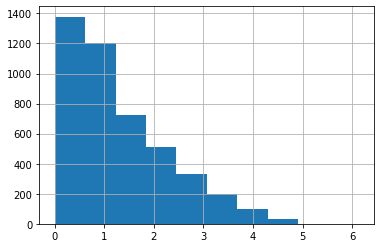

In [75]:
reg_shrink(model=LassoCV(normalize=True,cv=5), 
           train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

### Observations :
#### The LASSO CV model with the least RMSE error for the Validation dataset has the below error metrics :

- valid mse: 2.7163762268298384
- valid rmse: 1.6481432664758966
- valid mad: 1.2972378408043703

<font color = red> Decision Tree Regressor

Tree has 59 nodes


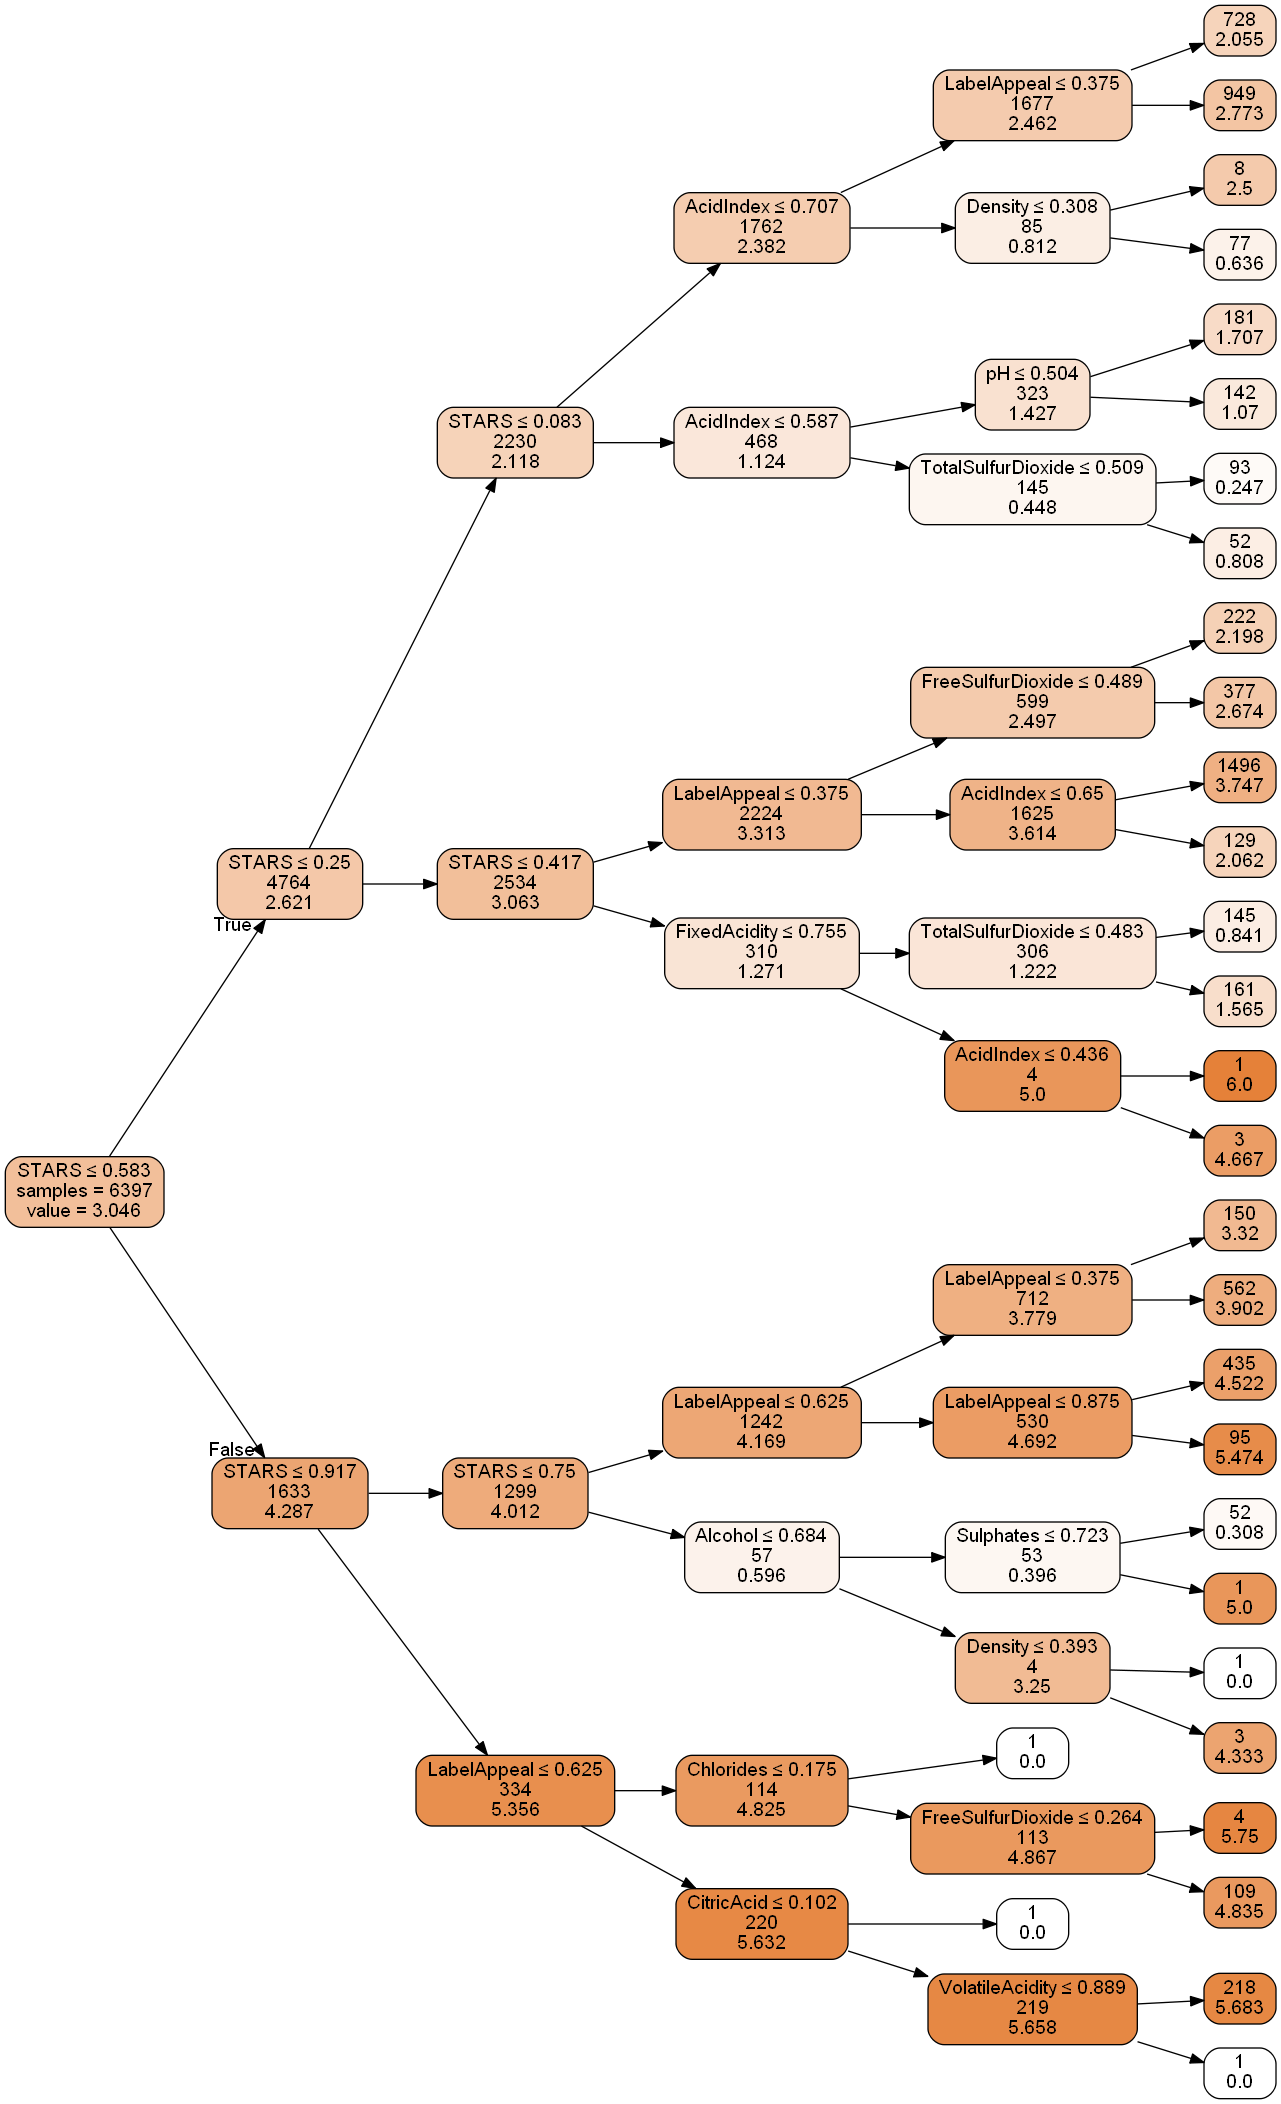

In [76]:
# Shallow tree

shallowTree = DecisionTreeRegressor(max_depth=5)

shallowTree.fit(train_X, train_y)
print('Tree has {} nodes'.format(shallowTree.tree_.node_count))
plotDecisionTree(shallowTree, feature_names=train_X.columns, rotate=True, impurity=False)

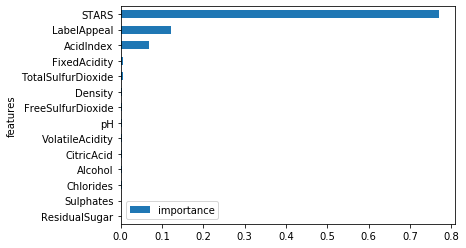

In [77]:
# Variable importance

importance_shallow = pd.DataFrame({'features': train_X.columns, 
                           'importance': shallowTree.feature_importances_})
importance_shallow.index=importance_shallow.features
importance_shallow.sort_values(by='importance', ascending=True).plot.barh()

STARS, LabelAppeal, ACidIndex and VolatileAcidity seem to be the prime contributers to TARGET in the shallow tree

In [78]:
print("Prediction error of Validation set for the Shallow Tree")
print("RMSE: ", str(mean_squared_error(valid_y, shallowTree.predict(valid_X))**.5))

Prediction error of Validation set for the Shallow Tree
RMSE:  1.5707220727754558


<font color =red> Random Forest Regressor

In [79]:
# user grid search to find optimized tree - RandomForestRegressor

param_grid = {
    'max_depth': [9],
    'min_samples_split':[5],
    'max_leaf_nodes': [52],
}
gridSearch = GridSearchCV(RandomForestRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

rf = gridSearch.best_estimator_

print("RMSE: "+str(mean_squared_error(valid_y, rf.predict(valid_X))**.5))

Improved parameters:  {'max_depth': 9, 'max_leaf_nodes': 52, 'min_samples_split': 5}
RMSE: 1.5071431234386243


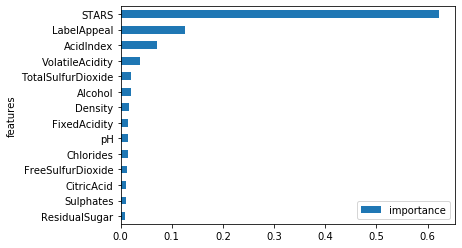

In [80]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': rf.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()

<font color = red> Gradient Boosting Regressor

In [85]:
# user grid search to find optimized tree - GradientBoostingRegressor

param_grid = {
    
    'learning_rate':list(np.arange(0.01,0.22,.01)),  #choose initial high learning rate
    'min_samples_split': list(np.arange(3,7)),
    'max_leaf_nodes': list(np.arange(4,7)), 
}

gridSearch = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

gbm = gridSearch.best_estimator_

print("RMSE: "+str(mean_squared_error(valid_y, gbm.predict(valid_X))**.5))

Improved parameters:  {'learning_rate': 0.19, 'max_leaf_nodes': 6, 'min_samples_split': 5}
RMSE: 1.4719045877616919


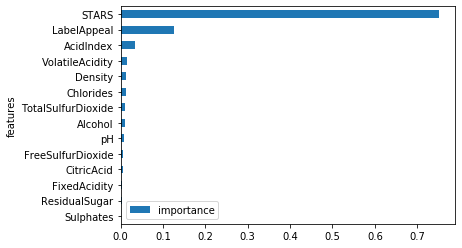

In [68]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': gbm.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()

<font color =red> AdaBoost Regressor

In [82]:
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8,min_samples_split=5,
                                               min_samples_leaf=5,max_features=14,random_state=1), 
                         n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
print("RMSE of Validation: "+str((mean_squared_error(valid_y, clf.predict(valid_X))**.5)))
print("RMSE of Training: "+str((mean_squared_error(train_y, clf.predict(train_X))**.5)))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=8,
                                                       max_features=14,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=1,
                                                       splitter='best'),
                  learn

<font color =red> Bagging Regressor

In [83]:
clf = BaggingRegressor(DecisionTreeRegressor(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1),
                        n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
print("RMSE of Validation: "+str((mean_squared_error(valid_y, clf.predict(valid_X))**.5)))
print("RMSE of Training: "+str((mean_squared_error(train_y, clf.predict(train_X))**.5)))

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=6,
                                                      max_features=10,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=5,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, boo

### Observations :
#### The Bagging Regressor model has lower RMSE error for the Validation dataset than the AdaBoost model :

- Bagging Regressor RMSE: 1.5054425258629212
- AdaBoost Regressor: 1.6430020448391252

 <font color =red> MLP Regressor

In [84]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs')

param_grid = {}
gridSearch = GridSearchCV(mlp_model, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

mlp_model = gridSearch.best_estimator_

print(mlp_model)
print("RMSE of Validation: "+str((mean_squared_error(valid_y, mlp_model.predict(valid_X))**.5)))
print("RMSE of Training: "+str((mean_squared_error(train_y, mlp_model.predict(train_X))**.5)))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
RMSE of Validation: 1.602453487496162
RMSE of Training: 1.5953849964181932


<font size = "4"><font color='blue'><br><b>4. MODEL SELECTION</b></br>

<font size = 4><b>The Models and the associated RMSE for the WINE database are summarized below:</b><br>

| Model | RMSE |
| --- | --- |
| Linear Regression | 1.6467826083060713 |
| LassoCV model | 1.6481432664758966 |
| Decision Tree Regressor | 1.5707220727754558 |
| Random Forest Regressor | 1.5071431234386243 |
| Gradient Boosting Regressor | 1.4719045877616919 |
| AdaBoost Regressor | 1.6430020448391252 |
| Bagging Regressor | 1.5054425258629212 |
| MLP Regressor |  1.602453487496162 |

<font size = "5"><font color='blue'><br><b>CONCLUSION</b></br>

- Analysis of the data reveals that the chemical predictor variables do not add sufficient predictive power above the STARS
ratings and LabelAppeal measurement.<br>
- It is evident from this dataset that wine sales are largely dependent on the <b>ratings of wine experts</b> and how much customers are appealed by the <b>Label</b>.
- Dataset has been analyzed using <b>PCA</b> and grouped into <b>4 distinct clusters.</b>Any future prediction of a test data can classify the TARGET sales into one of these clusters.

### Model Selection & Justification

- The <b>Gradient Boosting Regressor & Bagging Regressor</b> seem to have the <b>lowest RMSE</b> for the validation set.<br> 
- They have a </b>low implementation cost </b> as compared to other models and can thus be used as a predictive algorithm to determine Wine sales

The Wine dataset was explored, analyzed, divided into clusters and predictive models were built for future analysis. The models did not scale the TARGET outcome variable thus making prediction a whole lot easier. The Gradient Boosting and Bagging Regressor models could be used for wine sales prediction